In [1]:
# loading virtual env in Notebook
!source ./bin/activate

In [25]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
# loading data from https url to pandas
df = pd.read_csv('https://raw.githubusercontent.com/redashu/Datasets/refs/heads/master/advertising.csv')

In [4]:
# do some basics / metadata info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
# top 5 rows of data 
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
# select a single column
df["TV"]

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [7]:
# multi column 
df[["Radio","Sales"]]

,Radio,Sales
0,37.8,22.1
1,39.3,10.4
2,45.9,12.0
3,41.3,16.5
4,10.8,17.9
...,...,...
195,3.7,7.6
196,4.9,14.0
197,9.3,14.8
198,42.0,25.5


In [13]:
# selecting features and label
# label of ouptut 
label=df["Sales"]
# features or inputs 
features = df[["TV","Radio","Newspaper"]]
#print(features)

In [17]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [18]:
# split data into training (80) and test part (20) 
# test_size -- 0.0 to 1.0  -- 0.1 means 10% 
feature_train,feature_test,label_train,label_test=train_test_split(features,label,test_size=0.2)

In [20]:
# calling Linear Regression algo here with default parameters
model=LinearRegression()

In [21]:
# passing features and labels 80% data side to train the Model
trained_model=model.fit(feature_train,label_train)

In [22]:
# Passing the testing data to prediction outcome 
predicted_outcome=trained_model.predict(feature_test)
print(predicted_outcome)

[21.56324903  9.37235622 24.71817445 23.74729046 21.3722869  22.16420279
 11.46001598 17.98477015 16.64635925 10.18277854 22.01176821  9.66770521
 23.57842107 21.0131185  15.06350892 24.76922438  9.23109729 17.14533149
 11.29698591 10.76847442 15.92518707 10.22597038 13.46324813 12.29424152
 13.18800981 16.90021595 14.60630075  8.02209773 18.13045691 15.12903428
 19.38796594 24.34277986  8.85763088 19.44251341 18.17124251 11.77592771
 18.5726446  12.16990351 10.56857225  8.58664313]


In [23]:
# actual outcome 
print(label_test)

109    19.8
24      9.7
198    25.5
30     21.4
33     17.4
54     20.2
144    12.3
152    16.6
45     16.1
29     10.5
111    21.8
166     8.0
61     24.2
52     22.6
87     16.0
101    23.8
158     7.3
122    16.6
1      10.4
13     13.7
112    17.1
75      8.7
63     14.0
73     11.0
83     13.6
162    19.9
173    16.7
132     5.7
40     16.6
123    15.2
59     18.4
17     24.4
117     9.4
131    17.7
21     17.5
86     12.0
146    18.2
88     12.9
46     10.6
170     8.4
Name: Sales, dtype: float64


In [24]:
# to check model accuracy we can use many functions which are available in python libs

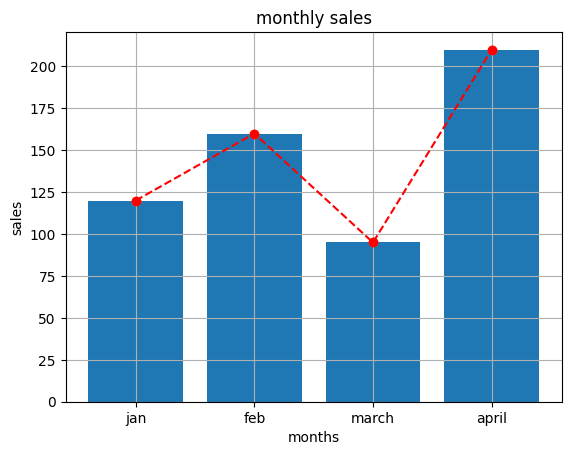

In [36]:
# basic graph desing using matplot lib 
months=['jan','feb','march','april']
sales=[120,160,95,210]
plt.xlabel("months")
plt.ylabel("sales")
plt.title("monthly sales")
plt.plot(months,sales,color='red',linestyle='--',marker='o') # for straight lines 
plt.bar(months,sales)
plt.scatter(months,sales)
plt.grid(True)
plt.show()

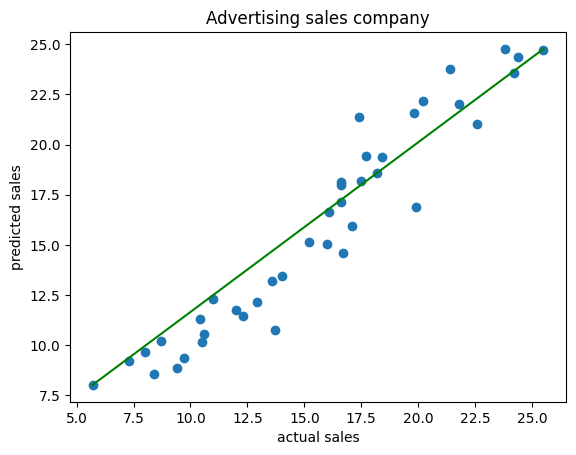

In [39]:
# lets plot graph of scatter type for predicted and actual values 
plt.title("Advertising sales company")
plt.xlabel("actual sales")
plt.ylabel("predicted sales")
plt.scatter(label_test,predicted_outcome)
plt.plot([min(label_test),max(label_test)],[min(predicted_outcome),max(predicted_outcome)],color='green')
plt.show()